## Check HDF5 File
Utility notebook used when make_plots.py isn't working as expected.<br>
Open an HDF5 output of workflows/SUEP_coffea.py and check out its contents.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [10]:
def h5load(ifile, label):
    with pd.HDFStore(ifile, 'r') as store:
        data = store[label] 
        metadata = store.get_storer(label).attrs.metadata
        return data, metadata

In [40]:
f = '../out.hdf5'
event_vars, m = h5load(f,'vars')

In [41]:
event_vars

,ntracks,ngood_fastjets,ht,ht_JEC,ht_JEC_JER_up,ht_JEC_JER_down,ht_JEC_JES_up,ht_JEC_JES_down,HLT_PFHT1050,ngood_ak4jets,...,SUEP_delta_mass_genMass_CL,SUEP_delta_pt_genPt_CL,ISR_nconst_CL,ISR_pt_avg_b_CL,ISR_S1_CL,ISR_pt_avg_CL,ISR_pt_CL,ISR_eta_CL,ISR_phi_CL,ISR_mass_CL
0,94,1,1125.37500,1078.716675,1078.716675,1078.716675,1078.716675,1078.716675,True,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,85,2,1801.68750,1718.879272,1718.879272,1718.879272,1718.879272,1718.879272,True,7,...,241.096846,266.775993,28.0,2.173239,0.347705,8.875070,238.707367,-0.503114,-2.163642,129.612710
2,72,2,1114.50000,1084.124512,1084.124512,1084.124512,1084.124512,1084.124512,True,2,...,89.052893,290.085733,18.0,2.317735,0.131091,14.946078,265.603549,-0.933249,-1.905814,53.576498
3,71,2,1199.65625,1179.805420,1179.805420,1179.805420,1179.805420,1179.805420,True,5,...,144.849791,356.107294,25.0,3.197416,0.580124,12.442657,304.953798,1.946993,1.359104,96.686116
4,89,1,1248.62500,1112.969604,1112.969604,1112.969604,1112.969604,1112.969604,True,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,102,2,1338.00000,1269.908569,1269.908569,1269.908569,1269.908569,1269.908569,True,4,...,128.836046,418.277345,21.0,1.735415,0.189717,12.859303,267.119018,1.261870,-1.480070,70.164884
85,80,2,1683.93750,1659.821411,1659.821411,1659.821411,1659.821411,1659.821411,True,4,...,163.763217,511.148485,27.0,10.371772,0.091450,18.364765,415.876704,0.121653,1.160556,323.489108
86,78,3,1313.18750,1265.315796,1265.315796,1265.315796,1265.315796,1265.315796,True,6,...,203.295076,248.875187,8.0,1.464078,0.122793,32.161394,256.568845,1.335878,1.454788,19.883001
87,97,2,1403.25000,1366.161377,1366.161377,1366.161377,1366.161377,1366.161377,True,5,...,412.908932,428.909053,42.0,3.383000,0.188867,9.678466,386.888490,0.641193,2.498642,145.791913


In [15]:
for key in event_vars:
    if "PS" not in key: continue
    print(key)

PSWeight_ISR_up
PSWeight_ISR_down
PSWeight_FSR_up
PSWeight_FSR_down


In [8]:
event_vars['resnet_SUEP_pred_model126']

0    0.999991
1    1.000000
2    0.999988
3    0.999999
4    1.000000
Name: resnet_SUEP_pred_model126, dtype: float32

In [33]:
jets = event_vars['ngood_fastjets']
htloose = event_vars['ht_loose']
httight = event_vars['ht_tight']

(array([1.4600e+02, 0.0000e+00, 4.4440e+03, 0.0000e+00, 3.6554e+04,
        0.0000e+00, 2.6530e+03, 0.0000e+00, 7.7000e+01, 2.0000e+00]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

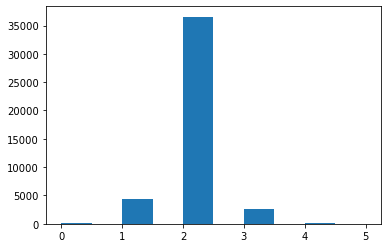

In [34]:
plt.hist(jets)

64909205.15625
64774388.28125


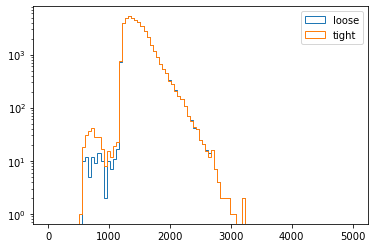

In [35]:
plt.hist(htloose, bins=np.linspace(0,5000,100),  histtype='step', label='loose')
plt.hist(httight, bins=np.linspace(0,5000,100), histtype='step', label='tight')
plt.yscale('log')
plt.legend()
print(np.sum(htloose))
print(np.sum(httight))